In [17]:
# Import libraries necessary for this project
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split as tts

%matplotlib inline

In [18]:
data = pd.read_csv('housingdata_1.csv')

price = data['price']
data.head(10)

,id,price,sqft_living,bedrooms,bathrooms,year_built,zipcode,address,Latitude,Longitude
0,1,1249000.0,6209.0,5,5.0,1986,80111,"Centennial, CO 80111",39.616672,-104.874651
1,2,220000.0,1422.0,5,4.0,1986,80111,"Centennial, CO 80111",39.616672,-104.874651
2,3,1250000.0,5614.0,2,3.0,1981,80111,"Greenwood Village, CO 80111",39.616672,-104.874651
3,4,599900.0,2785.0,4,3.0,1982,80111,"Englewood, CO 80111",39.616672,-104.874651
4,5,986950.0,3449.0,6,4.0,2019,80111,"Centennial, CO 80111",39.616672,-104.874651
5,6,182500.0,709.0,1,1.0,1979,80111,"Englewood, CO 80111",39.616672,-104.874651
6,7,222500.0,658.0,1,1.0,1987,80111,"Englewood, CO 80111",39.616672,-104.874651
7,8,599900.0,2952.0,4,3.0,1976,80111,"Centennial, CO 80111",39.616672,-104.874651
8,9,795000.0,3715.0,4,3.0,1979,80111,"Greenwood Village, CO 80111",39.616672,-104.874651
9,10,1150000.0,3502.0,4,3.0,1960,80111,"Greenwood Village, CO 80111",39.616672,-104.874651


In [19]:
data.tail(8)

,id,price,sqft_living,bedrooms,bathrooms,year_built,zipcode,address,Latitude,Longitude
58,59,1124950.0,3258.0,3,2.0,2019,80111,"Centennial, CO 80111",39.616672,-104.874651
59,60,875000.0,3307.0,5,5.0,1994,80111,"Englewood, CO 80111",39.616672,-104.874651
60,61,850000.0,4147.0,3,3.0,1994,80111,"Englewood, CO 80111",39.616672,-104.874651
61,62,1470000.0,5292.0,5,4.0,1981,80111,"Greenwood Village, CO 80111",39.616672,-104.874651
62,63,661559.0,3049.0,4,4.0,2018,80111,"Centennial, CO 80111",39.616672,-104.874651
63,64,715000.0,3593.0,5,3.0,1977,80111,"Greenwood Village, CO 80111",39.616672,-104.874651
64,65,524900.0,2334.0,4,3.0,1978,80111,"Englewood, CO 80111",39.616672,-104.874651
65,66,677544.0,2641.0,4,3.5,1978,80111,"Englewood, CO 80111",39.616672,-104.874651


In [20]:
data.shape

(66, 10)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 10 columns):
id             66 non-null int64
price          66 non-null float64
sqft_living    66 non-null float64
bedrooms       66 non-null int64
bathrooms      66 non-null float64
year_built     66 non-null int64
zipcode        66 non-null int64
address        66 non-null object
Latitude       66 non-null float64
Longitude      66 non-null float64
dtypes: float64(5), int64(4), object(1)
memory usage: 5.2+ KB


In [22]:
data.columns

Index(['id', 'price', 'sqft_living', 'bedrooms', 'bathrooms', 'year_built',
       'zipcode', 'address', 'Latitude', 'Longitude'],
      dtype='object')

In [23]:
# Minimum price of the data
minimum_price = np.amin(price)

# Maximum price of the data
maximum_price = np.amax(price)

# Mean price of the data
mean_price = np.mean(price)

# Median price of the data
median_price = np.median(price)

# Standard deviation of prices of the data
std_price = np.std(price)

# Show the calculated statistics
print("Statistics for housing dataset:\n")
print("Minimum price: rs {}".format(minimum_price)) 
print("Maximum price: rs {}".format(maximum_price))
print("Mean price: rs {}".format(mean_price))
print("Median price rs {}".format(median_price))
print("Standard deviation of prices: rs {}".format(std_price))

Statistics for housing dataset:

Minimum price: rs 182500.0
Maximum price: rs 1910991.0
Mean price: rs 804979.696969697
Median price rs 766534.5
Standard deviation of prices: rs 388597.83459065296


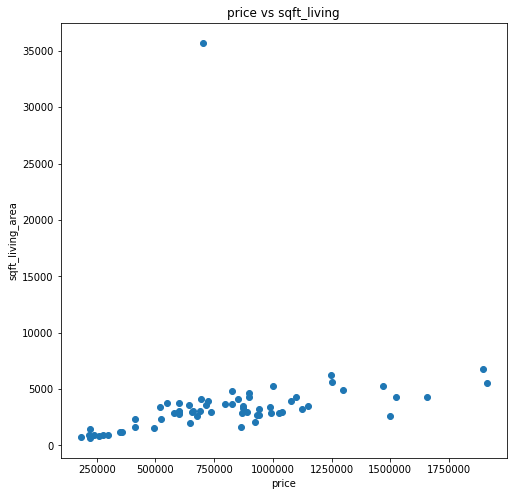

In [24]:
plt.figure(figsize=(8,8 ))
plt.scatter(x=data['price'],y=data['sqft_living'])
plt.title('price vs sqft_living')
plt.xlabel('price')
plt.ylabel('sqft_living_area')
plt.show()

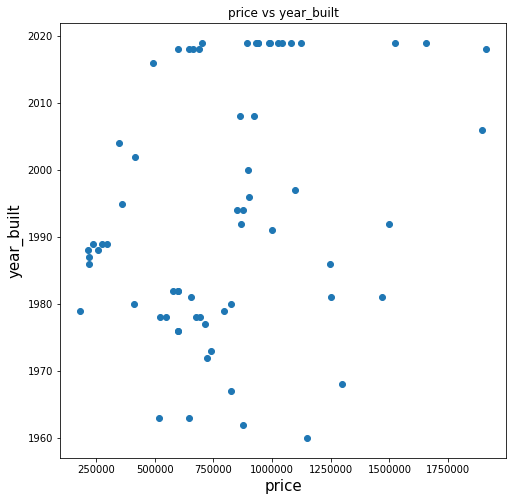

In [25]:
plt.figure(figsize=(8, 8))
plt.scatter(x=data['price'],y=data['year_built'])
plt.title('price vs year_built')
plt.xlabel('price',fontsize=15)
plt.ylabel('year_built',fontsize=15)
plt.show()

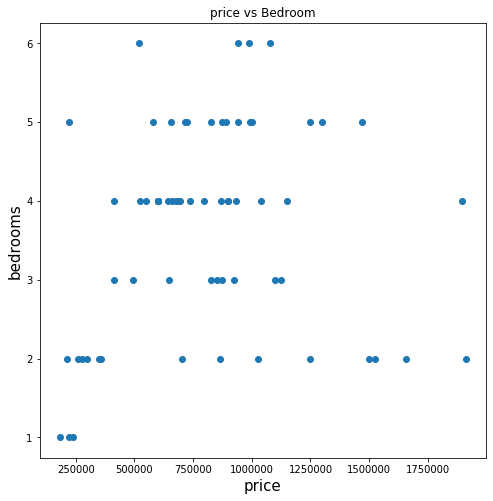

In [26]:
plt.figure(figsize=(8,8 ))
plt.scatter(x=data['price'],y=data['bedrooms'])
plt.title('price vs Bedroom')
plt.xlabel('price',fontsize=15)
plt.ylabel('bedrooms',fontsize=15)
plt.show()

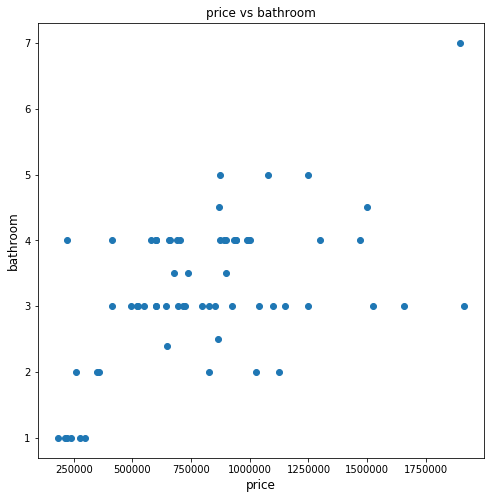

In [27]:
plt.figure(figsize=(8,8))
plt.scatter(x=data['price'],y=data['bathrooms'])
plt.title('price vs bathroom')
plt.ylabel('bathroom',fontsize=12)
plt.xlabel('price',fontsize=12)
plt.show()

In [28]:
#features are
fet=[ 'sqft_living', 'bedrooms', 'bathrooms', 'year_built',
       'zipcode', 'Latitude', 'Longitude']

x=data[fet]
y=data['price']

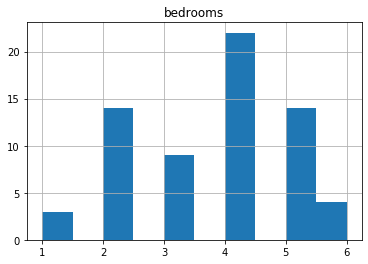

In [29]:
plt.title("bedrooms")
data['bedrooms'].hist()

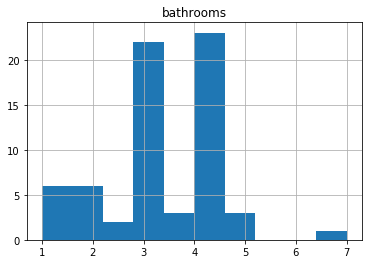

In [40]:
plt.title("bathrooms")
data['bathrooms'].hist()

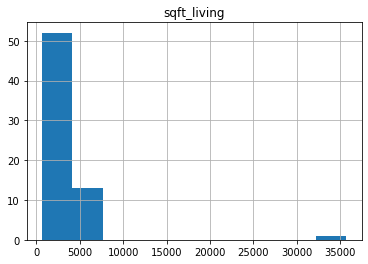

In [41]:
plt.title("sqft_living")
data['sqft_living'].hist()


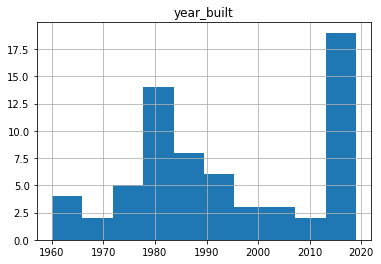

In [42]:
plt.title("year_built")
data['year_built'].hist()

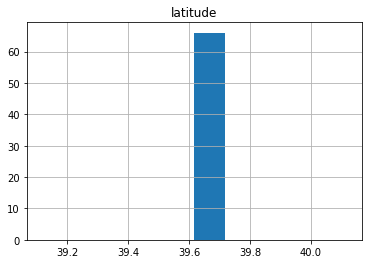

In [43]:
plt.title("latitude")
data['Latitude'].hist()

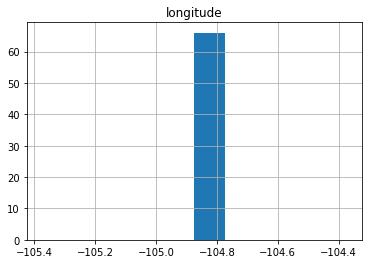

In [44]:
plt.title("longitude")
data['Longitude'].hist()

In [30]:
X_train, X_test, Y_train, Y_test = tts(x, y, test_size = 0.1, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(59, 7)
(7, 7)
(59,)
(7,)


In [33]:
# Fitting Polynomial Regression to the dataset 


poly = PolynomialFeatures(degree = 2) 
X_train_poly = poly.fit_transform(X_train) 

poly.fit(X_train_poly,Y_train) 
 


PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [34]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)

In [36]:
 # predicting on test data-set
y_test_predict = poly_model.predict(poly.fit_transform(X_test))

In [37]:
r2_test = r2_score(Y_test, y_test_predict)
print("Accuracy is {} %".format(int(r2_test*100)))

Accuracy is 51 %
